# EDA Analyssis 


## import .cvs file from previous step (SQL query)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("eda.csv") #import as df

## EDA Step 1 Data Understanding and 2 data preparation (done in SQL beaver)

Check: head, tail, coulms and rows (DF shape), Data types. DF Describe
Prepare: Eliminate duplicates, elinate irrelevant rows and columns

In [7]:
#Preview the first few rows of the DataFrame
df.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


## EDA Step 3  Basic descriptive stats / data type


In [13]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,...,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,2.159700e+04,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,...,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05,4.580474e+09,10799.000000
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,...,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,2.876736e+09,6234.661218
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,1.000102e+06,1.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,2.123049e+09,5400.000000
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,3.904930e+09,10799.000000
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,7.308900e+09,16198.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,9.900000e+09,21597.000000


In [15]:
df.dtypes #Check the data types of each column


id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

## EDA - Research questions

Client: Amy Williams
Characteristics: SELLER 
Mafiosi, sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI

SELLS: Central, top 10% priced Properties
<br><br>
NEEDS: average-priced homes in outskirt areas

### RQ 1: What are the top 10% properties by location and price? or What are central and non-central properies?  

### RQ 2: What are the top 10% properties by location and price? 

        #### H1: Top 10% properties are concetrated in central Zips 
        #### H2: Central properties have higher average sale price than non-central 
        #### H3: Non-central properties prices have increased over time (grow in less central market)









## EDA Step 4 Undestanding the data visually

## 4.1 EDA Univariate analisys (According to Research Questions)

### LOCATION: What are central and not central? - How is the dataset distributed according to ZIP codes ?

In [24]:
# Define central zip codes
central_zipcodes = [
    98101, 98104, 98105, 98109, 98121, 98122, 98154, 98164,  # Downtown
    98103, 98107, 98115, 98117,                             # North/Central Seattle
    98118, 98144, 98106, 98108                              # South Seattle (inner)
]

# Create new column 'location_type'
df['location_type'] = df['zipcode'].apply(lambda z: 'central' if z in central_zipcodes else 'non-central')

df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,location_type
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1,non-central
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2,non-central
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3,non-central
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4,non-central
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5,non-central


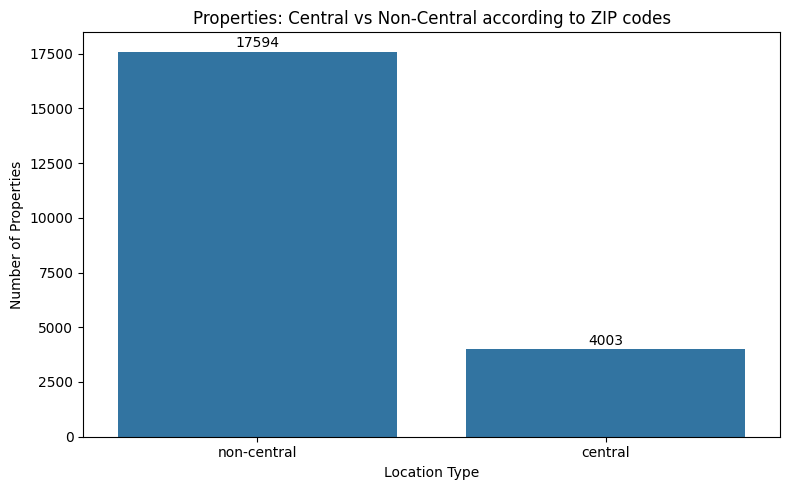

In [29]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='location_type')
plt.title('Properties: Central vs Non-Central according to ZIP codes')
plt.xlabel('Location Type')
plt.ylabel('Number of Properties')

# Add value labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height + 50), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


## PRICE: Univariate analysis

## 4.2 EDA Multivariate analisys (According to Research Questions)